In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
x = pd.read_csv('./train.csv', index_col='Id')
x_test = pd.read_csv("./train.csv",index_col='Id')

In [4]:
x.dropna(axis = 0, inplace=True, subset= ['SalePrice'])
y = x['SalePrice']

x.drop(['SalePrice'], axis=1, inplace=True)

In [5]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=0)

In [6]:

low_cardinality_cols = [cols for cols in X_train_full.columns 
                        
                        if X_train_full[cols].nunique() < 10 and
                        X_train_full[cols].dtype == "object"]

In [7]:
numeric_cols = [cols for cols in X_train_full.columns 
                 if X_train_full[cols].dtype in ['int64', 'float64']]


In [8]:
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = x_test[my_cols].copy()

X_train = pd.get_dummies(X_train)
X_valid - pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)

X_train, X_valid = X_train.align(X_valid, join = 'left',axis=1)
X_train,X_test = X_train.align(X_test, join = 'left', axis=1)

In [9]:
from xgboost import XGBRegressor
model = XGBRegressor(random_state = 0)
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [10]:
predictions = model.predict(X_valid)
from sklearn.metrics import mean_absolute_error
mae1 = mean_absolute_error(y_valid, predictions)
print("MAE:", mae1)

MAE: 28216.435760916094


In [11]:
my_model2 =XGBRegressor(n_estimators= 100, learning_rate = 0.05)
my_model2.fit(X_train,y_train)
pred2 = my_model2.predict(X_valid)
mae2 = mean_absolute_error(y_valid, pred2)
print("MAE with tuned model:", mae2)


MAE with tuned model: 23303.39867829623


In [12]:
my_model3 = XGBRegressor(n_estimators= 1000 ,learning_rate = 1, max_depth= 3, subsample= 0.5)
my_model3.fit(X_train,y_train)
pred3 = my_model3.predict(X_valid)
mae3 = mean_absolute_error(y_valid, pred3)
print("MAE with tuned model:", mae3)


MAE with tuned model: 134423.70486063499


In [14]:
# Make predictions with my_model3
predictions = my_model3.predict(X_test)

# Create submission DataFrame
output = pd.DataFrame({'Id': X_test.index, 'SalePrice': predictions})

# Save to CSV
output.to_csv('submission.csv', index=False)

print("submission.csv file created!")


submission.csv file created!


In [26]:
my_model4 =XGBRegressor(n_estimators= 1 )
my_model4.fit(X_train,y_train)
pred4 = my_model4.predict(X_valid)
mae4 = mean_absolute_error(y_valid, pred4)
print("MAE with tuned model:", mae4)


MAE with tuned model: 47672.68985445205


In [44]:
pred = my_model3.predict(X_test)

In [45]:
pred = pd.Series(pred, index=X_test.index, name="SalePrice")
pred.to_csv("submission.csv", header=True)

In [17]:
# Make predictions with my_model3
predictions = my_model4.predict(X_test)

# Create submission DataFrame
output = pd.DataFrame({'Id': X_test.index, 'SalePrice': predictions})

# Save to CSV
output.to_csv('submission1.csv', index=False)

print("submission.csv file created!")


submission.csv file created!


In [27]:
from sklearn.metrics import mean_absolute_error

# Predict using my_model3
pred3 = my_model3.predict(X_valid)

# Calculate MAE
mae3 = mean_absolute_error(y_valid, pred3)
print("MAE with my_model3:", mae3)

# Estimate accuracy
avg_price = y_valid.mean()
accuracy = 100 - (mae3 / avg_price * 100)
print(f"Approximate Accuracy: {accuracy:.2f}%")


MAE with my_model3: 134423.70486063499
Approximate Accuracy: 25.88%


In [28]:
from sklearn.metrics import r2_score

# Predict with my_model3
pred3 = my_model3.predict(X_valid)

# Calculate R² score
r2 = r2_score(y_valid, pred3)
print(f"R² Score for my_model3: {r2:.4f}")



R² Score for my_model3: -2.6132


In [29]:
accuracy_like = r2_score(y_valid, pred3) * 100
print(f"Accuracy-like score: {accuracy_like:.2f}%")


Accuracy-like score: -261.32%


📊 Evaluation of my_model3:
  ✅ MAE  : 134423.70
  ✅ RMSE : 157963.48
  ✅ R²    : -2.6132 (~ -261.32% accuracy-like)


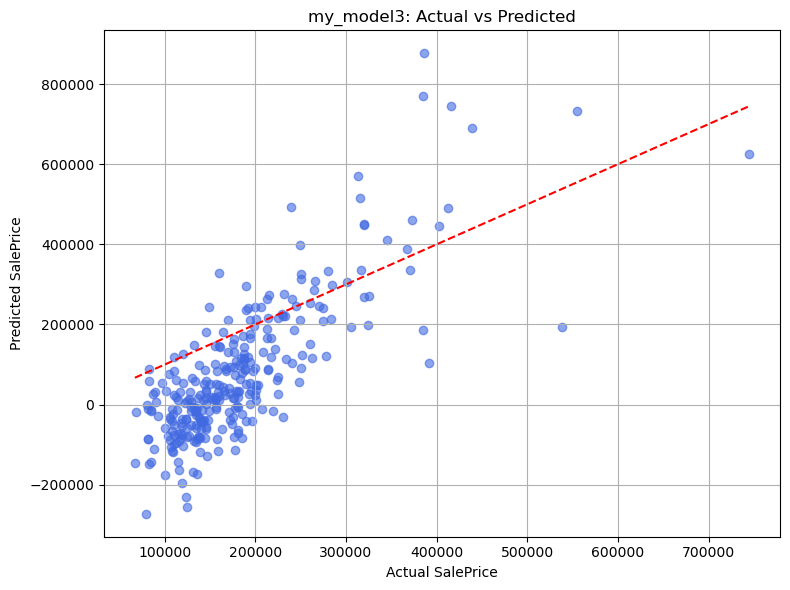

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Predict on validation data
pred3 = my_model3.predict(X_valid)

# Evaluation Metrics
mae = mean_absolute_error(y_valid, pred3)
rmse = np.sqrt(mean_squared_error(y_valid, pred3))
r2 = r2_score(y_valid, pred3)

print(f"📊 Evaluation of my_model3:")
print(f"  ✅ MAE  : {mae:.2f}")
print(f"  ✅ RMSE : {rmse:.2f}")
print(f"  ✅ R²    : {r2:.4f} (~ {r2 * 100:.2f}% accuracy-like)")

# Plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_valid, pred3, alpha=0.6, color='royalblue')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], '--r')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('my_model3: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()
